In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import crc32c as crc


Range Partitioning
2. The distribution is not uniform.
3. If most of the queries started with something in the range [c, n] since that's the most uniformly distributed area

Consistent Hashing
4. The distribution is not uniform.
5. If most of the queries started with something near the beginning or end of the alphabet since those are the most uniformly distributed areas

In [14]:
words = open("words.txt").readlines()

In [21]:
print len(words)
words = [x.lower() for x in words]
print words[:50]
buckets = [[] for x in range(26)]
print buckets

for word in words:
    bucket = ord(word[0])-97
    buckets[bucket].append(word)
    
entries = [len(bucket) for bucket in buckets]

235886
['a\n', 'a\n', 'aa\n', 'aal\n', 'aalii\n', 'aam\n', 'aani\n', 'aardvark\n', 'aardwolf\n', 'aaron\n', 'aaronic\n', 'aaronical\n', 'aaronite\n', 'aaronitic\n', 'aaru\n', 'ab\n', 'aba\n', 'ababdeh\n', 'ababua\n', 'abac\n', 'abaca\n', 'abacate\n', 'abacay\n', 'abacinate\n', 'abacination\n', 'abaciscus\n', 'abacist\n', 'aback\n', 'abactinal\n', 'abactinally\n', 'abaction\n', 'abactor\n', 'abaculus\n', 'abacus\n', 'abadite\n', 'abaff\n', 'abaft\n', 'abaisance\n', 'abaiser\n', 'abaissed\n', 'abalienate\n', 'abalienation\n', 'abalone\n', 'abama\n', 'abampere\n', 'abandon\n', 'abandonable\n', 'abandoned\n', 'abandonedly\n', 'abandonee\n']
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


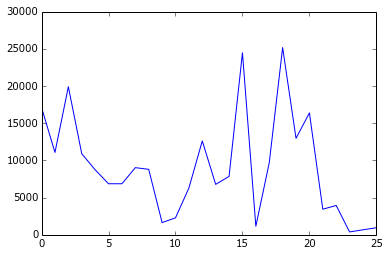

In [31]:
plt.plot(entries)
plt.show()

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


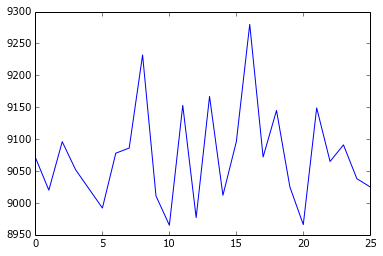

In [53]:
hashed_buckets = [[] for x in range(26)]
print hashed_buckets

for word in words:
    bucket_width = pow(2,32)/26
    bucket = crc.crc(word)/bucket_width
    hashed_buckets[bucket].append(word)
    
hashed_entries = [len(bucket) for bucket in hashed_buckets]
plt.plot(hashed_entries)
plt.show()

In [50]:
print pow(2,32)/26

165191049
